In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.2f}'.format)
np.set_printoptions(formatter={'float_kind': "{:.2f}".format})
%config InlineBackend.figure_format = 'svg'

In [2]:
path = '/home/arthur/Project/GeekBrains/DB_research/!ADDS/hw_1/orders_20190822.csv'
df = pd.read_csv(path, sep=';')

# задание соответствующих форматов столбцам
df['o_date'] = pd.to_datetime(df['o_date'], format='%d.%m.%Y')
df['year'] = df['o_date'].dt.year
df['price'] = df['price'].str.replace(',', '.').astype('float')
df['month'] = df['o_date'].dt.month.map("{:02}".format)
df['yymm'] = df['year'].astype('str').str.cat(df['month'].astype('str'), sep='/')

df

,id_o,user_id,price,o_date,year,month,yymm
0,1234491,337544,539.00,2016-01-01,2016,01,2016/01
1,1234494,171642,153.30,2016-01-01,2016,01,2016/01
2,1234497,260596,55.30,2016-01-01,2016,01,2016/01
3,1234498,1105609,752.50,2016-01-01,2016,01,2016/01
4,1234500,982696,4410.00,2016-01-01,2016,01,2016/01
...,...,...,...,...,...,...,...
2002799,6945524,5806002,825.30,2017-12-31,2017,12,2017/12
2002800,6945526,5919142,4934.30,2017-12-31,2017,12,2017/12
2002801,6945527,1574166,804.30,2017-12-31,2017,12,2017/12
2002802,6945528,5919156,5019.70,2017-12-31,2017,12,2017/12


# Винтажный анализ
*На основе данных по продажам за 16 и 17 год спрогнозировать товарооборот января 2018 года (с выводом кэфов поведения когротны по порядковому номеру месяца).*

***
### Cтроим все когорты
*по ГГММ первой покупки*

In [3]:
date_min = df.pivot_table(index='user_id', values='o_date', aggfunc='min')
date_min.columns = ['mindate']
date_min

,mindate
user_id,
0,2016-12-08
1,2016-01-04
76,2016-12-13
90,2016-07-16
91,2016-04-20
...,...
5919114,2017-12-31
5919118,2017-12-31
5919128,2017-12-31


In [4]:
df = df.merge(right=date_min, how='left', on='user_id')
# определяем бакеты
df['bucket'] = df['mindate'].dt.year.astype('str') + '/' + \
               df['mindate'].dt.month.map("{:02}".format).astype('str')
df

,id_o,user_id,price,o_date,year,month,yymm,mindate,bucket
0,1234491,337544,539.00,2016-01-01,2016,01,2016/01,2016-01-01,2016/01
1,1234494,171642,153.30,2016-01-01,2016,01,2016/01,2016-01-01,2016/01
2,1234497,260596,55.30,2016-01-01,2016,01,2016/01,2016-01-01,2016/01
3,1234498,1105609,752.50,2016-01-01,2016,01,2016/01,2016-01-01,2016/01
4,1234500,982696,4410.00,2016-01-01,2016,01,2016/01,2016-01-01,2016/01
...,...,...,...,...,...,...,...,...,...
2002799,6945524,5806002,825.30,2017-12-31,2017,12,2017/12,2017-12-31,2017/12
2002800,6945526,5919142,4934.30,2017-12-31,2017,12,2017/12,2017-12-31,2017/12
2002801,6945527,1574166,804.30,2017-12-31,2017,12,2017/12,2016-06-11,2016/06
2002802,6945528,5919156,5019.70,2017-12-31,2017,12,2017/12,2017-12-31,2017/12


In [5]:
# смотрим когорты
buckets = df.pivot_table(index='yymm', columns='bucket', values='price', aggfunc='sum')
buckets

bucket,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,...,2017/03,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12
yymm,,,,,,,,,,,,,,,,,,,,,
2016/01,96812334.85,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016/02,25468692.90,69967837.80,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016/03,25617635.40,9697389.80,79955600.20,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016/04,26668180.00,9643754.40,11745986.00,91266090.30,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016/05,19850250.70,7061441.80,7555766.40,8773004.80,65346879.50,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016/06,18961982.90,6251231.00,7256456.20,7379729.00,7395215.10,69431888.40,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016/07,16130663.50,4939075.40,5868718.80,6028442.70,5916285.90,6967968.70,67340672.70,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016/08,18981578.00,6240096.80,7354748.10,6635924.40,5604741.10,7031031.00,7144969.30,80568803.70,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016/09,18740327.90,6555354.40,7287154.70,6625572.80,5400168.20,6322236.90,5848847.90,7572620.30,88564741.30,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


***
### Понимаем как вымирает когорта. 
После 14 месяца обычно начинает мерцание на 2-5 процентов от первоначальной суммы.  
Итого, мы знаем как в среднем живут когорты.  

In [6]:
# получаем сумму чеков в 1 когорте, чтобы от нее посчитать проценты
bucket_first = df.loc[df['yymm'] == df['bucket']].pivot_table(index='bucket', values='price', aggfunc='sum')
bucket_first.columns = ['b_price']
bucket_first

,b_price
bucket,
2016/01,96812334.85
2016/02,69967837.80
2016/03,79955600.20
2016/04,91266090.30
2016/05,65346879.50
2016/06,69431888.40
2016/07,67340672.70
2016/08,80568803.70
2016/09,88564741.30


In [7]:
# смотрим процент от 1 месяца в бакете
buckets.divide(bucket_first['b_price'], axis='columns')

bucket,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,...,2017/03,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12
yymm,,,,,,,,,,,,,,,,,,,,,
2016/01,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016/02,0.26,1.00,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016/03,0.26,0.14,1.00,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016/04,0.28,0.14,0.15,1.00,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016/05,0.21,0.10,0.09,0.10,1.00,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016/06,0.20,0.09,0.09,0.08,0.11,1.00,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016/07,0.17,0.07,0.07,0.07,0.09,0.10,1.00,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016/08,0.20,0.09,0.09,0.07,0.09,0.10,0.11,1.00,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2016/09,0.19,0.09,0.09,0.07,0.08,0.09,0.09,0.09,1.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


***
### Строим прогноз на один месяц для уже существующих когорт и предполагаем какой сформируется новая.

In [8]:
num_buckets = df.pivot_table(index=['bucket', 'yymm'], values='price', aggfunc='sum').reset_index()
num_buckets

,bucket,yymm,price
0,2016/01,2016/01,96812334.85
1,2016/01,2016/02,25468692.90
2,2016/01,2016/03,25617635.40
3,2016/01,2016/04,26668180.00
4,2016/01,2016/05,19850250.70
...,...,...,...
295,2017/10,2017/11,16291594.90
296,2017/10,2017/12,11886180.60
297,2017/11,2017/11,194213575.50
298,2017/11,2017/12,13066993.10


In [9]:
# нумеруем когорты
i = 1 # счетчик когорты
for bucket in num_buckets['bucket'].unique():
    for d in num_buckets.loc[(num_buckets['bucket'] == bucket), 'yymm']:
        num_buckets.loc[(num_buckets['bucket'] == bucket) & 
                        (num_buckets['yymm'] == d), 'id'] = i
        i += 1
    i = 1
num_buckets['id'] = num_buckets['id'].astype('int64')

In [10]:
# добавляем значения 1 бакета и делим на него price
num_buckets = num_buckets.merge(right=bucket_first.reset_index(), how='left', on='bucket')
num_buckets['share'] = num_buckets['price'] / num_buckets['b_price']
num_buckets

,bucket,yymm,price,id,b_price,share
0,2016/01,2016/01,96812334.85,1,96812334.85,1.00
1,2016/01,2016/02,25468692.90,2,96812334.85,0.26
2,2016/01,2016/03,25617635.40,3,96812334.85,0.26
3,2016/01,2016/04,26668180.00,4,96812334.85,0.28
4,2016/01,2016/05,19850250.70,5,96812334.85,0.21
...,...,...,...,...,...,...
295,2017/10,2017/11,16291594.90,2,164016876.10,0.10
296,2017/10,2017/12,11886180.60,3,164016876.10,0.07
297,2017/11,2017/11,194213575.50,1,194213575.50,1.00
298,2017/11,2017/12,13066993.10,2,194213575.50,0.07


In [11]:
# получаем таблицу отношения каждой когорты к первой когорте
buckets_share = num_buckets.pivot_table(index='id', values='share', aggfunc='mean')
buckets_share

,share
id,
1,1.00
2,0.10
3,0.08
4,0.08
5,0.07
6,0.07
7,0.07
8,0.07
9,0.07


In [12]:
# получаем последние id бакетов и объем первого бакета
trend_bucket = num_buckets.pivot_table(index='bucket', values=['b_price','id'], aggfunc={'b_price': 'min', 'id':'max'})
trend_bucket

,b_price,id
bucket,,
2016/01,96812334.85,24
2016/02,69967837.80,23
2016/03,79955600.20,22
2016/04,91266090.30,21
2016/05,65346879.50,20
2016/06,69431888.40,19
2016/07,67340672.70,18
2016/08,80568803.70,17
2016/09,88564741.30,16


In [13]:
# увеличиваем id на 1 для прогнозного месяца
trend_bucket['id'] = trend_bucket['id'] + 1
trend_bucket.loc[trend_bucket['id'] == 25, 'id'] = 24

In [14]:
# подтягиваем долю для прогнозных id и делаем прогноз
trend_bucket = trend_bucket.merge(right=buckets_share.reset_index(), on='id')
trend_bucket['f_price'] = trend_bucket['b_price'] * trend_bucket['share']
trend_bucket

,b_price,id,share,f_price
0,96812334.85,24,0.11,10772057.80
1,69967837.80,24,0.11,7785140.13
2,79955600.20,23,0.09,7390834.43
3,91266090.30,22,0.08,7572326.23
4,65346879.50,21,0.07,4540830.43
5,69431888.40,20,0.07,4555440.15
6,67340672.70,19,0.06,3712658.17
7,80568803.70,18,0.05,4297455.16
8,88564741.30,17,0.05,4764303.13
9,126292121.20,16,0.06,6952678.51


In [15]:
# считаем прогноз по существующим когортам на следующий месяц
future_price = trend_bucket['f_price'].sum()
future_price

198586577.86560866

In [16]:
# считаем прогноз размера новой когорты на следующий месяц (смотрим соотношение январского бакета к декабрьскому и ноябрьскому и берем среднее)
b_dec_share = bucket_first.loc[bucket_first.index == r'2017/01'].squeeze() / bucket_first.loc[bucket_first.index == r'2016/12'].squeeze()
b_nov_share = bucket_first.loc[bucket_first.index == r'2017/01'].squeeze() / bucket_first.loc[bucket_first.index == r'2016/11'].squeeze()
future_new_price = (bucket_first.loc[bucket_first.index == r'2017/12'].squeeze() * b_dec_share + \
                    bucket_first.loc[bucket_first.index == r'2017/11'].squeeze() * b_nov_share) / 2
future_new_price

136103555.30999064

In [17]:
trend = num_buckets.pivot_table(index='yymm', values='price', aggfunc='sum').reset_index()
trend.loc[24, 'yymm'] = '2018/01'
trend.loc[24, 'price'] = future_price + future_new_price
trend['yymm'] = trend['yymm'].str.slice(2)
trend

,yymm,price
0,16/01,96812334.85
1,16/02,95436530.70
2,16/03,115270625.40
3,16/04,139324010.70
4,16/05,108587343.20
5,16/06,116676502.60
6,16/07,113191827.70
7,16/08,139561892.40
8,16/09,152917024.40
9,16/10,211633380.70


<AxesSubplot:xlabel='yymm', ylabel='price'>

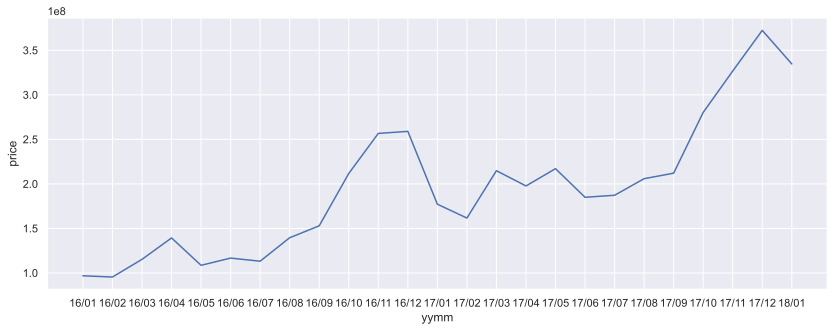

In [18]:
sns.set_theme()
plt.figure(figsize=(14, 5))
sns.lineplot(data=trend, x='yymm', y='price')

In [19]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))